## 使用python觀測太陽觀測資料

In [ ]:
!pip install sunpy[all]
!pip install astropy
!pip install astroquery

### 太陽影像圖：透過AIA儀器

In [ ]:
# TODO: 太陽影像圖：AIA儀器
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.map import Map

# 設定時間範圍
time = a.Time('2024/11/05 00:00', '2024/11/05 00:05')

# 設定觀測儀器和波長（例如 AIA 171 Å）
instrument = a.Instrument('AIA')
wavelength = a.Wavelength(304 * u.angstrom)

# 搜尋並下載符合條件的資料
# search_result = Fido.search(time, instrument, wavelength)
# downloaded_files = Fido.fetch(search_result)

In [ ]:
import matplotlib.pyplot as plt

# 使用 Map 物件來顯示其中一張影像
print("資料長度", len(downloaded_files))
image_file = downloaded_files[0]  # 使用第一個下載的檔案作為範例
map_obj = Map(image_file)

# 顯示觀測日期和影像資料
print("觀測日期:", map_obj.date)
print("曝光時間:", map_obj.exposure_time)
print("影像資料 (矩陣形式):")
print(map_obj.data)

# 使用 peek() 方法快速視覺化影像
map_obj.peek()
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()

### 太陽影像圖：透過LASCO儀器

In [ ]:
# TODO: 太陽影像圖：LASCO儀器
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.map import Map
import matplotlib.pyplot as plt

# 設定時間範圍(可以設定長一點)
time = a.Time('2023/11/05 00:00', '2023/11/05 00:05')

# 設定觀測儀器為 LASCO（不需要波長參數）
instrument = a.Instrument('LASCO')

# 搜尋並下載符合條件的資料
search_result = Fido.search(time, instrument)
downloaded_files = Fido.fetch(search_result)

# 使用 Map 物件來顯示其中一張影像
print("資料長度", len(downloaded_files))
image_file = downloaded_files[0]  # 使用第一個下載的檔案作為範例

# 嘗試讀取並顯示 LASCO 影像
try:
    map_obj = Map(image_file)
    # 顯示觀測日期和影像資料
    print("觀測日期:", map_obj.date)
    print("曝光時間:", map_obj.exposure_time)
    print("影像資料 (矩陣形式):")
    print(map_obj.data)
    
    # 使用 peek() 方法快速視覺化影像
    map_obj.peek()
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.show()
except Exception as e:
    print("無法顯示 LASCO 的影像:", e)
    # 使用 astropy.io.fits 直接讀取並顯示影像資料
    from astropy.io import fits
    with fits.open(image_file) as hdul:
        data = hdul[0].data  # 讀取影像資料
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.imshow(data, cmap='gray')
        plt.colorbar()
        plt.title("LASCO Image")
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.show()


### 太陽影像圖：透過HMI儀器

In [ ]:
# TODO: 太陽影像圖：AIA儀器
from sunpy.net import Fido, attrs as a
import astropy.units as u
from sunpy.map import Map

# 設定時間範圍
time = a.Time('2023/11/05 00:00', '2023/11/05 00:05')

# 設定觀測儀器和波長（例如 AIA 171 Å）
instrument = a.Instrument('HMI')
wavelength = a.Wavelength(6173 * u.angstrom)

# 搜尋並下載符合條件的資料
search_result = Fido.search(time, instrument, wavelength)
downloaded_files = Fido.fetch(search_result)

In [ ]:
import matplotlib.pyplot as plt

# 使用 Map 物件來顯示其中一張影像
print("資料長度", len(downloaded_files))
image_file = downloaded_files[0]  # 使用第一個下載的檔案作為範例
map_obj = Map(image_file)

# 顯示觀測日期和影像資料
print("觀測日期:", map_obj.date)
print("曝光時間:", map_obj.exposure_time)
print("影像資料 (矩陣形式):")
print(map_obj.data)

# 使用 peek() 方法快速視覺化影像
map_obj.peek()
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()

### 顯示GOES X-ray Sensor (XRS) 的時間序列
- 0.5–4.0 Å (Angstrom)：這段波長對應的是軟X射線輻射，主要用來監測太陽的低層電離層活動。在圖中用藍色（白天）和綠色（晚上）表示。
- 1.0–8.0 Å (Angstrom)：這段波長對應的是較硬的 X 射線輻射，通常用來追蹤太陽的耀斑活動和輻射強度的變化。在圖中用紅色（白天）和紫色（晚上）表示。

- 波段的數據可以提供以下資訊
    - 太陽耀斑活動：圖中不同波段的尖峰表現出 X 射線輻射的劇烈變化，可能對應於太陽耀斑。耀斑的活動強度依波段和輻射類型（如 X、M、C 級）標記在圖的右側，分別代表不同的輻射強度。
    - 輻射強度變化：太陽活動的不同階段在這些波段有不同的強度變化，白天和晚上在特定時間點的強度變化可顯示出不同的太陽活動狀況。
    - 空間天氣影響：這些 X 射線數據可用於監測地球附近空間環境的變化，尤其是當強烈的耀斑活動發生時，會對電離層、衛星運作和通信等產生影響。

Files Downloaded:   0%|          | 0/4 [00:00<?, ?file/s]

下載的檔案: ['C:\\Users\\33313\\sunpy\\data\\sci_xrsf-l2-flx1s_g16_d20230521_v2-2-0.nc', 'C:\\Users\\33313\\sunpy\\data\\sci_xrsf-l2-avg1m_g16_d20230521_v2-2-0.nc', 'C:\\Users\\33313\\sunpy\\data\\sci_xrsf-l2-flx1s_g18_d20230521_v2-2-0.nc', 'C:\\Users\\33313\\sunpy\\data\\sci_xrsf-l2-avg1m_g18_d20230521_v2-2-0.nc']


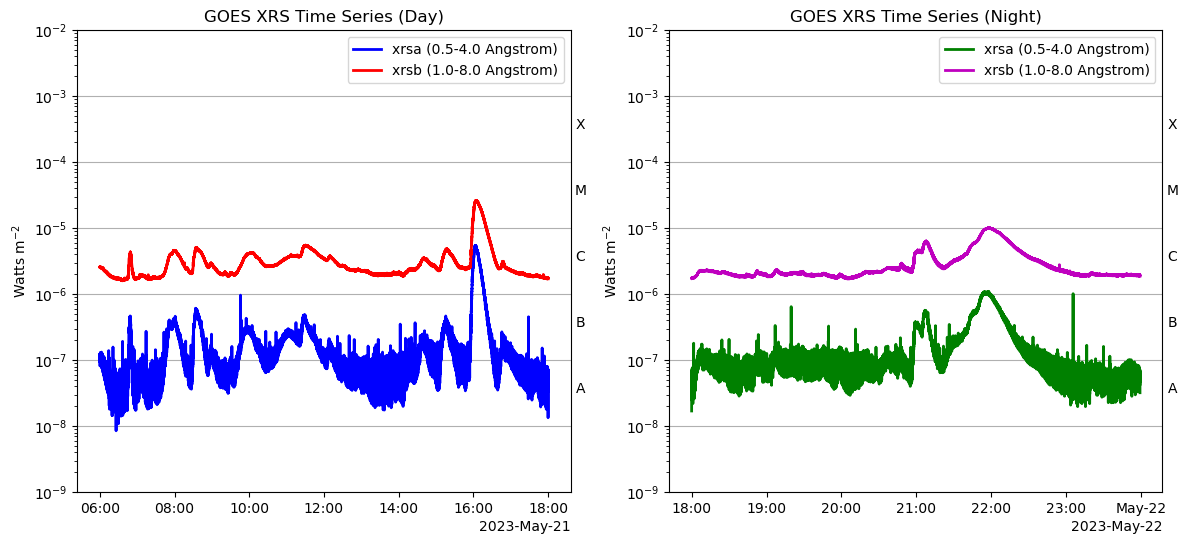

In [1]:
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from sunpy.time import TimeRange

# 設定日期（可以更改為你想要的日期）
date = '2023-05-21'

# 使用 Fido 搜尋符合條件的 GOES 衛星 XRS 資料
search_result = Fido.search(a.Time(date + ' 00:00', date + ' 23:59'), a.Instrument('GOES'))

# 檢查是否有符合的結果
if len(search_result[0]) > 0:
    # 下載資料
    downloaded_files = Fido.fetch(search_result)
    print("下載的檔案:", downloaded_files)

    # 合併多個下載檔案成一個 TimeSeries 物件
    ts_obj = TimeSeries(downloaded_files, concatenate=True, source='XRS')

    # 設定白天的時間範圍 (06:00 到 18:00)
    day_range = TimeRange(date + ' 06:00', date + ' 18:00')
    ts_obj_day = ts_obj.truncate(day_range)

    # 設定晚上的時間範圍 (18:00 到 23:59)
    night_range = TimeRange(date + ' 18:00', date + ' 23:59')
    ts_obj_night = ts_obj.truncate(night_range)

    # 創建一個 1 行 2 列的圖形，分別顯示白天和晚上的時間序列
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # 繪製白天的時間序列
    ts_obj_day.plot(axes=ax1)
    ax1.set_title('GOES XRS Time Series (Day)')
    lines1 = ax1.get_lines()
    lines1[0].set_color('b')  # 設定 xrsa 線條顏色為藍色
    lines1[0].set_label('xrsa (0.5-4.0 Angstrom)')
    lines1[1].set_color('r')  # 設定 xrsb 線條顏色為紅色
    lines1[1].set_label('xrsb (1.0-8.0 Angstrom)')
    ax1.legend()

    # 繪製晚上的時間序列
    ts_obj_night.plot(axes=ax2)
    ax2.set_title('GOES XRS Time Series (Night)')
    lines2 = ax2.get_lines()
    lines2[0].set_color('g')  # 設定截取後 xrsa 線條顏色為綠色
    lines2[0].set_label('xrsa (0.5-4.0 Angstrom)')
    lines2[1].set_color('m')  # 設定截取後 xrsb 線條顏色為洋紅色
    lines2[1].set_label('xrsb (1.0-8.0 Angstrom)')
    ax2.legend()

    # 顯示圖表
    plt.show()
else:
    print("未找到符合指定日期的 GOES 衛星資料。")


## 將一段時間的太陽去做成GIF(不要跑，檔案會超大超久)

In [ ]:
# from sunpy.net import Fido, attrs as a
# import astropy.units as u
# from sunpy.map import Map
# import matplotlib.pyplot as plt
# import imageio  # 用於生成 GIF
# import os

# # 設定時間範圍（2024/11/05 0:00 到 2024/11/05 22:00）
# time = a.Time('2024/11/05 00:00', '2024/11/05 22:00')

# # 設定觀測儀器和波長（例如 AIA 171 Å）
# instrument = a.Instrument('AIA')
# wavelength = a.Wavelength(171 * u.angstrom)

# # 搜尋並下載符合條件的資料
# search_result = Fido.search(time, instrument, wavelength)
# downloaded_files = Fido.fetch(search_result)

# # 確認是否有下載的檔案
# if len(downloaded_files) > 1:
#     # 創建一個暫時的文件夾來存放影像
#     temp_folder = "temp_images"
#     os.makedirs(temp_folder, exist_ok=True)

#     # 循環處理每個影像並儲存為 PNG
#     image_files = []
#     for i, file in enumerate(downloaded_files):
#         # 將每一張 FITS 影像讀取為 Map 物件
#         map_obj = Map(file)

#         # 設定圖片保存路徑
#         image_path = os.path.join(temp_folder, f"image_{i}.png")
#         map_obj.plot()  # 繪製影像
#         plt.savefig(image_path)  # 保存影像為 PNG 格式
#         plt.close()  # 關閉當前繪圖視窗
#         image_files.append(image_path)  # 儲存圖片路徑

#     # 使用 imageio 將所有 PNG 影像整合為 GIF
#     with imageio.get_writer("solar_animation.gif", mode="I", duration=0.2) as writer:
#         for image_path in image_files:
#             image = imageio.imread(image_path)
#             writer.append_data(image)

#     # 清理暫時文件夾中的影像
#     for image_path in image_files:
#         os.remove(image_path)
#     os.rmdir(temp_folder)

#     print("GIF 影像已保存為 solar_animation.gif")
# else:
#     print("未找到符合條件的影像資料。")


In [9]:
import lightkurve as lk
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 搜尋 Kepler-10 的影像資料
tpf_search_result = lk.search_targetpixelfile('Kepler-10', mission='Kepler')
tpf = tpf_search_result[0].download()

# 生成光變曲線資料
lc = tpf.to_lightcurve()
time = lc.time.value.tolist()  # 將時間序列轉換為純數字列表
flux = lc.flux.value.tolist()  # 將光度資料轉換為純數字列表

# 提取像素資料
print(len(time))
selected_time_index = len(time) // 3  # 選擇特定時間點的索引
selected_time = time[selected_time_index]
pixel_data = tpf.flux[selected_time_index].value
pixel_shape = pixel_data.shape
x_coords = list(range(pixel_shape[1]))
y_coords = list(range(pixel_shape[0]))

# 創建具有左右子圖的圖表，比例設定為 7:3
fig = make_subplots(
    rows=1, cols=2, 
    column_widths=[0.7, 0.3], 
    subplot_titles=("Lightcurve", "Pixel Data")
)

# 左邊子圖：光變曲線
fig.add_trace(
    go.Scatter(x=time, y=flux, mode='lines', name='Light Curve'),
    row=1, col=1
)

# 在光變曲線中繪製紅色垂直線
fig.add_trace(
    go.Scatter(
        x=[selected_time, selected_time],
        y=[min(flux), max(flux)],
        mode='lines',
        line=dict(color='red', width=2, dash='dash'),
        name='Selected Time'
    ),
    row=1, col=1
)

# 右邊子圖：像素資料 (熱圖)
fig.add_trace(
    go.Heatmap(
        z=pixel_data, x=x_coords, y=y_coords, 
        colorscale='Viridis',
        colorbar=dict(title='Flux')
    ),
    row=1, col=2
)

# 更新圖表佈局
fig.update_layout(
    title_text="Kepler-10 Lightcurve and Corresponding Pixel Data",
    width=1200,
    height=500,
    showlegend=False,
    font=dict(
        family="Times New Roman",
        size=14,  # 可以根據需要調整字體大小
        color="black"  # 可以根據需要調整字體顏色
    )
)
# 調整左右子圖的軸標籤
fig.update_xaxes(title_text='Time (days)', row=1, col=1)
fig.update_yaxes(title_text='Flux (e/s)', row=1, col=1)
fig.update_xaxes(title_text='Pixel Column Number', row=1, col=2)
fig.update_yaxes(title_text='Pixel Row Number', row=1, col=2)

# 顯示圖表
fig.show()


43363
